### Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

In [2]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
#stock market data between 2001~2005
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


Lag1~5 : 5 previous trading days from Today <br>
Volume : the number of shares traded on the previous day, in billions<br>
Today : the percentage return on the data in question<br>
Direction : whether the market was Up or Down on this data<br>

In [4]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [5]:
#chech the correlation between variables
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


there's no correlation for the 'Direction' (qualitative variable)

<AxesSubplot:>

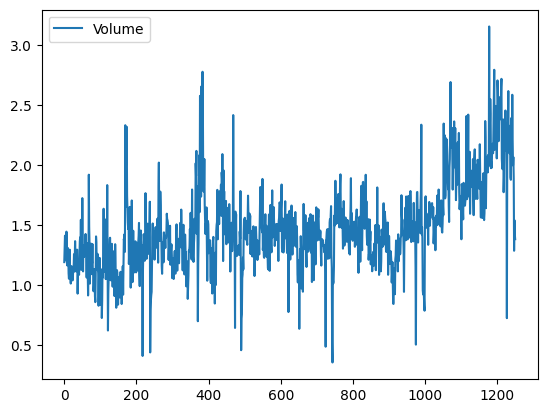

In [6]:
"""
showing the average number of shares traded daily
which increased from 2001 to 2005
"""

Smarket.plot(y='Volume')

### Logistic Regression
fit the model for predicting 'Direction' using 'Lag#' and 'Volume'

In [7]:
allvars = Smarket.columns.drop(['Today','Direction','Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == 'Up'

glm = sm.GLM(y,X,family = sm.families.Binomial())
#family=sm.families.Binomial()
#in order to tell statsmodels to run a logistic regression

results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


P-value of Lag1 is the smallest but still large relatively <br>
Means there's no clear evidence of a real association between 'Lag1'and 'Direction' so as others..

In [8]:
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [9]:
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [10]:
#probability that the market will go up, given the values of the predictors
#the number of probs will be same as the real data points
probs = results.predict()
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [11]:
labels = np.array(['Down']*1250)
labels[probs > 0.5] = 'Up'

In [12]:
confusion_table(labels, Smarket.Direction)

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [13]:
#two methods in oder to compute the accuracy
(507+145)/1250, np.mean(labels == Smarket.Direction)

(0.5216, 0.5216)

### Validation Set approach

In [14]:
train = (Smarket.Year < 2005)
test = (Smarket.Year >= 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[test]
Smarket_test.shape

(252, 9)

In [15]:
X_train, X_test = X.loc[train], X.loc[test]
y_train, y_test = y.loc[train], y.loc[test]
glm_train = sm.GLM(y_train, X_train, familiy = sm.families.Binomial())
results = glm_train.fit()

probs = results.predict(exog = X_test)

/Users/kwak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['familiy']
  warnings.warn(msg, ValueWarning)


In [16]:
D = Smarket.Direction
L_train, L_test = D.loc[train],D.loc[test]

In [17]:
labels = np.array(['Down']*252)
labels[probs > 0.5] ='Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [18]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.4801587301587302, 0.5198412698412699)

it shows that the test error > train error

###### Logistic Regression with only 'Lag1', 'Lag2'
###### which has the smallest p-value from all the others

In [19]:
model = MS(['Lag1','Lag2']).fit(Smarket)
X = model.transform(Smarket)
X_train , X_test = X.loc[train], X.loc[test]
glm_train = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog = X_test)
lables = np.array(['Down']*252)
labels[probs > 0.5] = 'Up'
confusion_table (labels, L_test)

Truth,Down,Up
Predicted,,
Down,35,34
Up,76,107


In [20]:
#total accuracy, accuracy when model predicts 'Direction' == 'Up'
(35+107)/252, (107)/(107+76)

(0.5634920634920635, 0.5846994535519126)

In [21]:
newdata = pd.DataFrame({'Lag1':[1.2, 1.5],'Lag2':[1.1,-0.8]})
newX = model.transform(newdata)
results.predict(newX)

0    0.479146
1    0.496094
dtype: float64

<br>

### Linear Discriminant Analysis

LDA minimizes in-class variance,maximizing covaraince between classes

In [22]:
lda = LDA(store_covariance = True)

In [23]:
#LDA, QDA itself adds an intercept
X_train, X_test = [M.drop(columns = ['intercept']) for M in [X_train,X_test]]
lda.fit(X_train, L_train) #lda.fit() requires training data, and label of training data

LinearDiscriminantAnalysis(store_covariance=True)

In [24]:
lda.means_
#Row in .means_ function represents the class, here it means Up, Down (same as class number)
#Column means feature means in each class, here each columns are Lag1,Lag2 (same as feature number)

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [25]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [26]:
lda.priors_
#prior probability of each class(each class's charging rate)

array([0.49198397, 0.50801603])

In [27]:
lda.scalings_
#value for linear combination of Lag1 and Lag2
#-0.64 * Lag1 -0.51 * Lag2

array([[-0.64201904],
       [-0.51352928]])

In [28]:
lda_pred = lda.predict(X_test)

In [29]:
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [30]:
lda_prob = lda.predict_proba(X_test) #probability of which class to involve 
np.all(np.where(lda_prob[:,1] >= 0.5, 'Up','Down')== lda_pred) #'index = 1' == 'Up'
#confirming the method using other way than lda.predict is same as lda.predict

True

In [31]:
np.all([lda.classes_[i] for i in np.argmax(lda_prob, 1)] == lda_pred)

True

In [32]:
np.sum(lda_prob[:,0]>0.9) #sum up the number of 'Down' probability that exceeds the value 0.9

0

### Quadratic Discriminant Analysis

In [33]:
qda = QDA(store_covariance = True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [34]:
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [35]:
qda.covariance_[0]
#computing covariance regarding to class1(here, it's 'Down') for each features
#also add to make quadratic form

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [36]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


In [37]:
np.mean(qda_pred == L_test)

0.5992063492063492

### Naive Bayes

In [38]:
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [39]:
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [40]:
NB.class_prior_

array([0.49198397, 0.50801603])

In [41]:
NB.theta_ #feature means of each class, rows are class, cols are features

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [42]:
NB.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [43]:
X_train[L_train == 'Down'].mean()

Lag1    0.042790
Lag2    0.033894
dtype: float64

In [44]:
X_train[L_train == 'Down'].var(ddof = 0) #delta degree of freedom

Lag1    1.503554
Lag2    1.532467
dtype: float64

ddof = 0 : compute the variance with all data points <br>
ddof = 1 : compute the variacne with n-1 (reduce the bias in small sample)

In [45]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [46]:
NB.predict_proba(X_test)[:5]

array([[0.4873288 , 0.5126712 ],
       [0.47623584, 0.52376416],
       [0.46529531, 0.53470469],
       [0.47484469, 0.52515531],
       [0.49020587, 0.50979413]])

### K-Nearest Neighbors

In [47]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,43,58
Up,68,83


In [48]:
(83+43)/252, np.mean(knn1_pred == L_test)

(0.5, 0.5)

In [49]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train,L_train).predict(X_test)
np.mean(knn3_pred == L_test)

0.5317460317460317

In [50]:
Caravan = load_data('Caravan')
Purchase = Caravan.Purchase
Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [51]:
348/5822

0.05977327378907592

In [52]:
feature_df = Caravan.drop(columns = ['Purchase'])

In [53]:
#proceeding mean-varinace Standardization
scaler = StandardScaler(with_mean = True, with_std = True, copy = True)

In [54]:
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)

In [55]:
feature_std = pd.DataFrame(X_std, columns = feature_df.columns)
feature_std.std()

MOSTYPE     1.000086
MAANTHUI    1.000086
MGEMOMV     1.000086
MGEMLEEF    1.000086
MOSHOOFD    1.000086
              ...   
AZEILPL     1.000086
APLEZIER    1.000086
AFIETS      1.000086
AINBOED     1.000086
ABYSTAND    1.000086
Length: 85, dtype: float64

In [56]:
(X_train, X_test, y_train, y_test) = train_test_split(feature_std, Purchase, test_size=1000, random_state=0)

In [58]:
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1 = knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test.values)
np.mean(y_test != knn1_pred), np.mean(y_test != 'No')

/Users/kwak/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(0.111, 0.067)

In [59]:
confusion_table(knn1_pred, y_test)

Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


In [60]:
9/(53+9)

0.14516129032258066

In [67]:
for K in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train,y_train).predict(X_test.values)
    C = confusion_table(knn_pred,y_test)
    templ = ('K={0:d}, number of predicted to rent: {1:>2},'+
            'number of who did rent: {2:d}, accuracy: {3:.1%}')
    pred = C.loc['Yes'].sum()
    did_rent = C.loc['Yes','Yes']
    print(templ.format(K, pred, did_rent, did_rent/pred))

/Users/kwak/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/kwak/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/kwak/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/kwak/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


K=1, number of predicted to rent: 62,number of who did rent: 9, accuracy: 14.5%
K=2, number of predicted to rent:  6,number of who did rent: 1, accuracy: 16.7%
K=3, number of predicted to rent: 20,number of who did rent: 3, accuracy: 15.0%
K=4, number of predicted to rent:  4,number of who did rent: 0, accuracy: 0.0%
K=5, number of predicted to rent:  7,number of who did rent: 1, accuracy: 14.3%


/Users/kwak/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [73]:
logit = LogisticRegression(C=1e10, solver = 'liblinear') #'C' works as regularization parameter,smaller value represents stronger regularization
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1]> 0.5,'Yes','No')
confusion_table(logit_labels,y_test)

Truth,No,Yes
Predicted,,
No,931,67
Yes,2,0


In [74]:
logit_labels = np.where(logit_pred[:,1] > 0.25, 'Yes','No')
confusion_table(logit_labels,y_test)

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


In [75]:
9/(20+9)

0.3103448275862069

### Linear and Poisson Regession

In [76]:
Bike = load_data('Bikeshare')

In [77]:
Bike.shape, Bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

#### Linear Regression

In [79]:
X = MS(['mnth','hr','workingday','temp','weathersit']).fit_transform(Bike)
Y = Bike['bikers']
M_lm = sm.OLS(Y,X).fit()
summarize(M_lm)

,coef,std err,t,P>|t|
intercept,-68.6317,5.307,-12.932,0.000
mnth[Feb],6.8452,4.287,1.597,0.110
mnth[March],16.5514,4.301,3.848,0.000
mnth[April],41.4249,4.972,8.331,0.000
mnth[May],72.5571,5.641,12.862,0.000
mnth[June],67.8187,6.544,10.364,0.000
mnth[July],45.3245,7.081,6.401,0.000
mnth[Aug],53.2430,6.640,8.019,0.000
mnth[Sept],66.6783,5.925,11.254,0.000
mnth[Oct],75.8343,4.950,15.319,0.000


In [83]:
hr_encode = contrast('hr','sum')
mnth_encode = contrast('mnth','sum')
#encoding method: sum contrast, 
#for hr, contrast the hr with sum of hr(one day mean)
#for mnth, contrast each mnth values with annual(sum of mnth value) mean

In [85]:
X2 = MS([mnth_encode,
        hr_encode, 'workingday','temp','weathersit']).fit_transform(Bike)
M2_lm = sm.OLS(Y,X2).fit()
S2 = summarize(M2_lm)
S2

,coef,std err,t,P>|t|
intercept,73.5974,5.132,14.340,0.000
mnth[Jan],-46.0871,4.085,-11.281,0.000
mnth[Feb],-39.2419,3.539,-11.088,0.000
mnth[March],-29.5357,3.155,-9.361,0.000
mnth[April],-4.6622,2.741,-1.701,0.089
mnth[May],26.4700,2.851,9.285,0.000
mnth[June],21.7317,3.465,6.272,0.000
mnth[July],-0.7626,3.908,-0.195,0.845
mnth[Aug],7.1560,3.535,2.024,0.043
mnth[Sept],20.5912,3.046,6.761,0.000


In [87]:
# confirm how those two models differentially interpret the data
np.sum((M_lm.fittedvalues - M2_lm.fittedvalues)**2)

2.880368527181398e-19

In [88]:
#another method for confirming the model similarity in predicting data
np.allclose(M_lm.fittedvalues, M2_lm.fittedvalues)

True

In [90]:
coef_month = S2[S2.index.str.contains('mnth')]['coef']
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
Name: coef, dtype: float64

In [91]:
months = Bike['mnth'].dtype.categories
coef_month = pd.concat([coef_month,
                       pd.Series([-coef_month.sum()],
                                index = ['mnth[Dec]'
                                        ])
                       ])
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
mnth[Dec]       0.3705
dtype: float64